# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(len(lats))
print(len(lngs))

623
1500
1500


In [3]:
# create a data frame to hold all the data
df = pd.DataFrame({'City': cities})
df['Latitude'] = ""
df['Longitude'] = ""
df['Cloudiness'] = ""
df['Country'] = ""
df['Date'] = ""
df['Humidity'] = ""
df['Max Temp'] = ""
df['Wind Speed'] = ""

# display data frame
df.head()

,City,Latitude,Longitude,Cloudiness,Country,Date,Humidity,Max Temp,Wind Speed
0,punta arenas,,,,,,,,
1,atar,,,,,,,,
2,port alfred,,,,,,,,
3,east london,,,,,,,,
4,yellowknife,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Create settings dictionary with information we're interested in
settings = {"units": "metric", "appid": api_key}

In [5]:
# create for loop to loop through all the data and fill out the table
for index, row in df.iterrows():
    try:
        data = owm.get_current(row['City'], **settings)
        df.set_value(index, 'Latitude', data["coord"]['lat'])
        df.set_value(index, 'Longitude', data["coord"]['lon'])
        df.set_value(index, 'Cloudiness', data["clouds"]["all"])
        df.set_value(index, "Country", data["sys"]["country"])
        df.set_value(index, "Date", data["dt"])
        df.set_value(index, "Humidity", data["main"]["humidity"] )        
        df.set_value(index, "Max Temp", data["main"]["temp_max"])
        df.set_value(index, "Wind Speed",  data["wind"]["speed"])
        
        print(f"Processed {row['City']}, {data['weather'][0]['id']}")
    except Exception as e:
        print("City Not found: " + row['City'])

Processed punta arenas, 500
Processed atar, 800
Processed port alfred, 800
Processed east london, 800
Processed yellowknife, 800
Processed torbay, 802
Processed tazovskiy, 803
City Not found: bargal
Processed kavieng, 500
Processed shingu, 500
Processed kiama, 800
Processed avarua, 802
Processed kapaa, 803
Processed busselton, 803
Processed tuatapere, 800
Processed clyde river, 600
Processed narsaq, 804
City Not found: taolanaro
Processed rikitea, 802
Processed ribeira grande, 800
Processed vaini, 800
Processed katsuura, 520
Processed constitucion, 800
Processed rieti, 741
Processed bredasdorp, 800
City Not found: nizhneyansk
Processed upernavik, 803
Processed jamestown, 800
Processed hermanus, 800
Processed hobyo, 803
Processed yeppoon, 803
Processed buy, 804
Processed cape town, 800
Processed puerto ayora, 800
Processed la ronge, 802
Processed celmira, 800
Processed cabo san lucas, 802
Processed kasongo, 800
Processed geraldton, 800
Processed albany, 800
Processed bluff, 500
Processe

Processed osakarovka, 803
Processed vostok, 800
Processed fare, 804
Processed havre, 800
City Not found: saint quentin
Processed saint anthony, 600
Processed kerchevskiy, 804
Processed burdur, 803
Processed venado tuerto, 800
Processed lahaina, 501
Processed vernon, 804
Processed marawi, 801
Processed alice springs, 800
Processed saryozek, 801
City Not found: maghama
Processed havelock, 801
City Not found: yefimovskiy
City Not found: tumannyy
City Not found: korla
City Not found: asau
Processed birjand, 801
Processed agirish, 804
Processed kodiak, 800
Processed lakes entrance, 500
Processed amuntai, 501
Processed iquique, 800
Processed coquimbo, 800
City Not found: tsihombe
Processed rincon, 800
Processed tilichiki, 803
City Not found: guajara-mirim
Processed khash, 800
Processed sarh, 800
Processed esperance, 801
Processed mtsensk, 804
Processed aguia branca, 500
Processed suhbaatar, 800
Processed brunico, 801
Processed te anau, 800
Processed belmonte, 501
Processed gamboma, 803
City 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# clean data, remove all missing cities
df_clean = df[df["Latitude"] != ""]
df_clean.head()

,City,Latitude,Longitude,Cloudiness,Country,Date,Humidity,Max Temp,Wind Speed
0,punta arenas,-53.16,-70.91,90,CL,1551856392,93,4,2.1
1,atar,20.52,-13.05,0,MR,1551856653,35,7.54,1.27
2,port alfred,-33.59,26.89,0,ZA,1551856587,86,25.56,2.24
3,east london,-33.02,27.91,0,ZA,1551852720,69,26,6.2
4,yellowknife,62.45,-114.38,5,CA,1551855770,84,-17.78,2.6


In [7]:
# export to csv
output_data_file = df_clean.to_csv("../Output/cities.csv",index = None, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

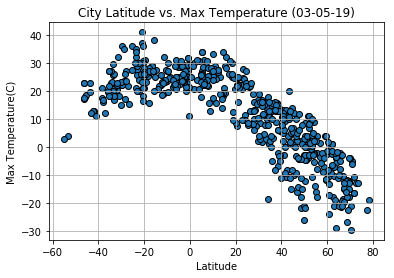

In [8]:
# plot scatter 
plt.scatter(df_clean['Latitude'], df_clean['Max Temp'], edgecolors = 'k')

# format
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title('City Latitude vs. Max Temperature (03-05-19)')
plt.grid()

# save figure
plt.savefig('../Output/lat_vs_max_temp.png')

#### Latitude vs. Humidity Plot

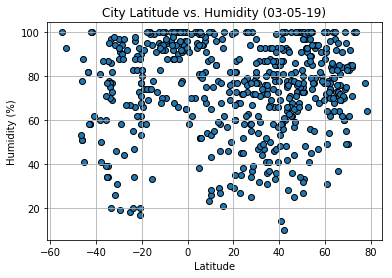

In [9]:
# plot scatter 
plt.scatter(df_clean['Latitude'], df_clean['Humidity'], edgecolors = 'k')

# format
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (03-05-19)')
plt.grid()

# save figure
plt.savefig('../Output/lat_vs_humidity.png')

#### Latitude vs. Cloudiness Plot

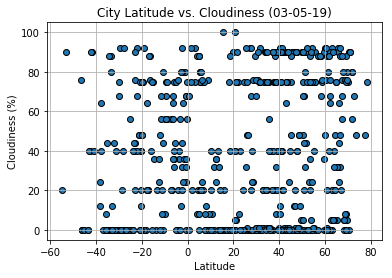

In [10]:
# plot scatter 
plt.scatter(df_clean['Latitude'], df_clean['Cloudiness'], edgecolors = 'k')

# format
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (03-05-19)')
plt.grid()

# save figure
plt.savefig('../Output/lat_vs_cloudiness.png')

#### Latitude vs. Wind Speed Plot

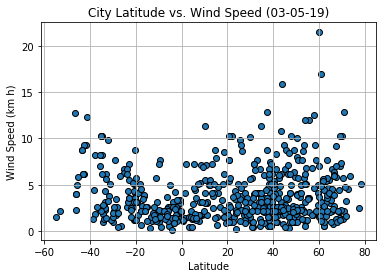

In [11]:
# plot scatter 
plt.scatter(df_clean['Latitude'], df_clean['Wind Speed'], edgecolors = 'k')

# format
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (km h)')
plt.title('City Latitude vs. Wind Speed (03-05-19)')
plt.grid()

# save figure
plt.savefig('../Output/lat_vs_wind_speed.png')